In [463]:
# This is a new notebook for the NLP stuff. Feel free to rip some of this for the numeric stuff.
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import string
import re
import unidecode

In [464]:
# Read in the restaurant data
restaurants = pd.read_json('restaurants.json').T

In [465]:
restaurants.shape

(14089, 16)

In [466]:
restaurants.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
le-pain-quotidien-new-york-137,ce605OMECZ3jLZtk6dCDHA,le-pain-quotidien-new-york-137,Le Pain Quotidien,https://s3-media3.fl.yelpcdn.com/bphoto/z-YqDX...,False,https://www.yelp.com/biz/le-pain-quotidien-new...,84,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",3.0,"{'latitude': 40.7112998613948, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '395 S End Ave', 'address2': '', ...",+16466188930,(646) 618-8930,812.911847
creperie-new-york-6,B8yFj4qt-HgMCbF5S-GkgA,creperie-new-york-6,Creperie,https://s3-media1.fl.yelpcdn.com/bphoto/uydGkc...,False,https://www.yelp.com/biz/creperie-new-york-6?a...,19,"[{'alias': 'creperies', 'title': 'Creperies'}]",2.5,"{'latitude': 40.711547382455, 'longitude': -74...",[],$,"{'address1': '255 Liberty St', 'address2': '',...",,,762.969495
dos-toros-taqueria-new-york-5,WZLhPYaYSFy7M_-Jh1VuNw,dos-toros-taqueria-new-york-5,Dos Toros Taqueria,https://s3-media1.fl.yelpcdn.com/bphoto/fNdfBJ...,False,https://www.yelp.com/biz/dos-toros-taqueria-ne...,132,"[{'alias': 'mexican', 'title': 'Mexican'}]",3.5,"{'latitude': 40.712342, 'longitude': -74.01528}",[],$$,"{'address1': '225 Liberty St', 'address2': 'St...",+13472189518,(347) 218-9518,756.603792
umami-burger-new-york-17,tFQRwk9SVOFgpMBZ55UrLw,umami-burger-new-york-17,Umami Burger,https://s3-media2.fl.yelpcdn.com/bphoto/uvquI3...,False,https://www.yelp.com/biz/umami-burger-new-york...,333,"[{'alias': 'burgers', 'title': 'Burgers'}]",3.0,"{'latitude': 40.712344, 'longitude': -74.015511}","[delivery, pickup]",$$,"{'address1': '225 Liberty St', 'address2': 'St...",+19177284400,(917) 728-4400,756.603792
naya-brookfield-place-new-york-3,jhs35REmv8Yo9-Z27KQJSA,naya-brookfield-place-new-york-3,NAYA - Brookfield Place,https://s3-media3.fl.yelpcdn.com/bphoto/Zd6LgX...,False,https://www.yelp.com/biz/naya-brookfield-place...,32,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 40.71156, 'longitude': -74.01533}","[pickup, delivery]",NaN,"{'address1': '225 Liberty St', 'address2': 'Fl...",+19299468404,(929) 946-8404,756.603792


In [467]:
# Read in the review data
# Define dataframe for reviews
reviews = pd.DataFrame()

# Loop through all review .jsons
for letter in string.ascii_lowercase + '0':
    path = "{}/reviews/{}.json".format(os.getcwd(), letter)
    with open(path, "r") as json_file:
        alias_to_reviews = json.loads(json_file.read())

        # For each alias, get reviews
        for alias in alias_to_reviews.keys():

            # Flatten structure into dataframe, track alias for easy groupby/merge with restaurants
            review = pd.json_normalize(alias_to_reviews[alias], sep="_")
            review['alias'] = alias
            
            # Stitch into final dataframe
            reviews = pd.concat([reviews, review], ignore_index=True)
            
reviews.shape

(331693, 8)

In [468]:
reviews.head()

,photoCount,reviewCount,eliteYear,localizedDate,rating,comment_text,comment_language,alias
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,en,ani-ramen-house-new-york
1,580.0,148.0,2023.0,6/8/2023,4.0,We&#39;ve been to ani ramen in Montclair New J...,en,ani-ramen-house-new-york
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,en,ani-ramen-house-new-york
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,en,ani-ramen-house-new-york
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,en,ani-ramen-house-new-york


In [469]:
# Find restaurants with missing reviews
missing_reviews = restaurants['name'][restaurants['alias'].isin(reviews['alias']) == False].reset_index()
missing_reviews.columns = ['alias', 'name']
missing_reviews

,alias,name
0,sauce-pizzeria-new-york-8,Sauce Pizzeria
1,sams-crispy-chicken-new-york-4,Sam's Crispy Chicken
2,springbone-kitchen-new-york-7,Springbone Kitchen
3,atrio-wine-bar-and-restaurant-new-york-2,Atrio Wine Bar & Restaurant
4,er-hotpot-new-york-4,ER Hotpot
...,...,...
3207,edgewater-sandwich-edgewater,Edgewater Sandwich
3208,india-grill-and-curry-edgewater,India Grill And Curry
3209,plaza-yankees-restaurant-bronx,Plaza Yankees Restaurant
3210,super-m-deli-new-york,Super M Deli


In [470]:
missing_reviews.nunique() # Multiple aliases for restaurants, many to one relationship due to locations

alias    3212
name     3021
dtype: int64

In [471]:
# Paste the dictionary here for now - to see if we have missing michelins
mich_dict = {'Eleven Madison Park': 'eleven-madison-park-new-york',
 'Le Bernardin': 'le-bernardin-new-york',
 'Masa': 'masa-new-york',
 'Per Se': 'per-se-new-york',
 'Al Coro': 'al-coro-new-york',
 'Aquavit': 'aquavit-new-york',
 'Aska': 'aska-brooklyn-3',
 'Atera': 'atera-new-york',
 'Atomix': 'atomix-new-york',
 'Blue Hill at Stone Barns': 'family-meal-at-blue-hill-new-york',
 'Daniel': 'daniel-new-york-4',
 'Gabriel Kreuther': 'gabriel-kreuther-new-york',
 'Jean-Georges': 'jean-georges-new-york-2',
 'Jungsik': 'jungsik-new-york',
 'The Modern': 'the-modern-new-york-3',
 'Odo': 'odo-new-york',
 'Saga': 'saga-new-york-6',
 'Sushi Noz': 'sushi-noz-new-york',
 'Sixty Three Clinton': 'sixty-three-clinton-new-york',
 'Bōm': 'bōm-new-york-3',
 'Casa Mono': 'casa-mono-new-york',
 'Caviar Russe': 'caviar-russe-new-york',
 'Clover Hill': 'clover-hill-brooklyn',
 'Cote': 'cote-korean-steakhouse-new-york',
 'Crown Shy': 'crown-shy-new-york-2',
 'Dirt Candy': 'dirt-candy-new-york-2',
 'Essential by Christophe': 'essential-by-christophe-new-york-2',
 'Estela': 'estela-new-york-2',
 'Family Hill at Blue Hill': 'family-meal-at-blue-hill-new-york',
 'The Four Horseman': 'the-four-horsemen-brooklyn',
 'Francie': 'francie-brooklyn',
 'Frevo': 'frevo-new-york',
 'Gramercy Tavern': 'gramercy-tavern-new-york',
 'Hirohisa': 'hirohisa-new-york',
 'Icca': 'icca-new-york',
 'Jeju Noodle Bar': 'jeju-noodle-bar-new-york',
 'Jōji': 'joji-new-york-2',
 'Joomak Banjum': 'joomak-banjum-new-york',
 'Jua': 'jua-new-york',
 'Kochi': 'kochi-new-york',
 'Kosaka': 'kosaka-new-york-2',
 "L'Abeille": 'l-abeille-new-york',
 'Le Coucou': 'le-coucou-new-york',
 'Le Jardinier': 'le-jardinier-new-york',
 'Le Pavillon': 'le-pavillon-new-york',
 'Mari': 'mari-new-york-2',
 'Meju': 'meju-long-island-city',
 'The Musket Room': 'the-musket-room-new-york',
 'Noda': 'noda-new-york',
 'Noz 17': 'noz-17-new-york-4',
 'Oiji Mi': 'oiji-mi-new-york-2',
 'One White Street': 'one-white-street-new-york',
 'Oxalis': 'oxalis-brooklyn',
 'Oxomoco': 'oxomoco-brooklyn-2',
 'Red Paper Clip': 'red-paper-clip-new-york',
 'Restaurant Yuu': 'restaurant-yuu-brooklyn',
 'Rezdôra': 'rezdôra-new-york-4',
 'Semma': 'semma-new-york-2',
 'Shion 69 Leonard Street': 'shion-69-leonard-st-new-york',
 'Shmoné': 'shmoné-new-york',
 'Sushi Amane': 'sushi-amane-new-york',
 'Sushi Ichimura': 'sushi-ichimura-new-york-3',
 'Sushi Nakazawa': 'sushi-nakazawa-new-york',
 'Sushi Yasuda': 'sushi-yasuda-new-york',
 'Tempura Matsui': 'tempura-matsui-new-york',
 'Torien': 'torien-new-york',
 'Torrisi': 'torrisi-new-york-2',
 'Tsukimi': 'tsukimi-new-york',
 'Tuome': 'tuome-new-york-2',
 'Vestry': 'vestry-new-york',
 'Yoshino': 'yoshino-new-york-3'
 }

In [472]:
# Check that aliases are present in the reviews, and in the restaurants
mich_dict = pd.Series(mich_dict)
mich_dict

Eleven Madison Park    eleven-madison-park-new-york
Le Bernardin                  le-bernardin-new-york
Masa                                  masa-new-york
Per Se                              per-se-new-york
Al Coro                            al-coro-new-york
                                   ...             
Torrisi                          torrisi-new-york-2
Tsukimi                            tsukimi-new-york
Tuome                              tuome-new-york-2
Vestry                              vestry-new-york
Yoshino                          yoshino-new-york-3
Length: 71, dtype: object

In [473]:
mich_reviews = mich_dict.isin(reviews['alias'])
len(mich_reviews), sum(mich_reviews) # Seems like we are missing 8 michelins in our reviews

(71, 63)

In [474]:
# Let's see if we can find the Michelins in our restaurant data...
mich_res = mich_dict.isin(restaurants['alias'])
len(mich_res), sum(mich_res) # Seems like the same 8 are missing in our restaurant data, which makes sense

(71, 63)

In [475]:
find_mich = mich_dict[mich_dict.isin(reviews['alias']) == False & mich_dict.isin(restaurants['alias'])].reset_index()
find_mich # This is good news, we are not missing any Manhattan Michelins. Obv makes sense because we only scraped with Manhattan neighborhood

,index,0
0,Aska,aska-brooklyn-3
1,Clover Hill,clover-hill-brooklyn
2,The Four Horseman,the-four-horsemen-brooklyn
3,Francie,francie-brooklyn
4,Meju,meju-long-island-city
5,Oxalis,oxalis-brooklyn
6,Oxomoco,oxomoco-brooklyn-2
7,Restaurant Yuu,restaurant-yuu-brooklyn


In [476]:
# Let's do a merger with restaurant name and reviews for analysis
names = restaurants[['alias', 'name', 'categories', 'price', 'coordinates']]
names

,alias,name,categories,price,coordinates
le-pain-quotidien-new-york-137,le-pain-quotidien-new-york-137,Le Pain Quotidien,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",$$,"{'latitude': 40.7112998613948, 'longitude': -7..."
creperie-new-york-6,creperie-new-york-6,Creperie,"[{'alias': 'creperies', 'title': 'Creperies'}]",$,"{'latitude': 40.711547382455, 'longitude': -74..."
dos-toros-taqueria-new-york-5,dos-toros-taqueria-new-york-5,Dos Toros Taqueria,"[{'alias': 'mexican', 'title': 'Mexican'}]",$$,"{'latitude': 40.712342, 'longitude': -74.01528}"
umami-burger-new-york-17,umami-burger-new-york-17,Umami Burger,"[{'alias': 'burgers', 'title': 'Burgers'}]",$$,"{'latitude': 40.712344, 'longitude': -74.015511}"
naya-brookfield-place-new-york-3,naya-brookfield-place-new-york-3,NAYA - Brookfield Place,"[{'alias': 'mediterranean', 'title': 'Mediterr...",NaN,"{'latitude': 40.71156, 'longitude': -74.01533}"
...,...,...,...,...,...
super-m-deli-new-york,super-m-deli-new-york,Super M Deli,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",NaN,"{'latitude': 40.82537, 'longitude': -73.9258}"
happy-wok-bronx,happy-wok-bronx,Happy Wok,"[{'alias': 'chinese', 'title': 'Chinese'}]",NaN,"{'latitude': 40.8253575861454, 'longitude': -7..."
justins-pizza-bronx,justins-pizza-bronx,Justin's Pizza,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",$$,"{'latitude': 40.8269227, 'longitude': -73.9263..."
justin-s-pizza-bronx-2,justin-s-pizza-bronx-2,Justin’s Pizza,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",NaN,"{'latitude': 40.82702, 'longitude': -73.92627}"


In [477]:
# Merge dataframes for analysis
df = pd.merge(reviews, names, on='alias')
df.shape

(331693, 12)

In [478]:
df.head()

,photoCount,reviewCount,eliteYear,localizedDate,rating,comment_text,comment_language,alias,name,categories,price,coordinates
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,en,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
1,580.0,148.0,2023.0,6/8/2023,4.0,We&#39;ve been to ani ramen in Montclair New J...,en,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,en,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,en,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,en,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."


In [479]:
# Trim what we will not use for efficiency
df.drop(['comment_language'], axis=1, inplace=True)
df.head()

,photoCount,reviewCount,eliteYear,localizedDate,rating,comment_text,alias,name,categories,price,coordinates
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
1,580.0,148.0,2023.0,6/8/2023,4.0,We&#39;ve been to ani ramen in Montclair New J...,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."


In [480]:
# Flatten the categories column to just reflect the title, then we can check if it includes a specific tag for filtering (using .isin())
df['categories'] = df['categories'].apply(lambda x: [item['title'] for item in x])

# Rename columns for ease
df.columns = ['user_photo_count', 'user_review_count', 'elite_year', 'review_date','rating','review','alias','name','categories','price','location']

df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
1,580.0,148.0,2023.0,6/8/2023,4.0,We&#39;ve been to ani ramen in Montclair New J...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156..."


In [481]:
# Start some processing of the text
dup_reviews = df[df['review'].duplicated(keep=False)]
dup_reviews
# Drop these, we already have them and don't want people just pasting what they have seen/already said

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location
3636,NaN,482.0,NaN,9/27/2022,5.0,There is a very kind and patient employee by t...,angelika-film-center-and-café-new-york-new-york-3,Angelika Film Center & Café - New York,"[Cinema, Cafes, Bars]",$$,"{'latitude': 40.72583042190133, 'longitude': -..."
4933,35.0,182.0,NaN,4/27/2022,4.0,Bottom line up front: check the store name and...,amarone-scarlatto-new-york,Amarone Scarlatto,[Italian],$$,"{'latitude': 40.76171494384402, 'longitude': -..."
4967,35.0,182.0,NaN,4/27/2022,4.0,Bottom line up front: check the store name and...,amarone-ny-new-york-2,Amarone NY,"[Italian, Seafood]",$$,"{'latitude': 40.7617199, 'longitude': -73.99002}"
5963,7798.0,898.0,2023.0,7/30/2017,3.0,I was in and out because I knew exactly what I...,au-bon-pain-new-york-6,Au Bon Pain,[Sandwiches],$,"{'latitude': 40.756959, 'longitude': -73.990495}"
6051,7798.0,898.0,2023.0,9/16/2018,2.0,I was in and out because I knew exactly what I...,au-bon-pain-new-york-47,Au Bon Pain,"[Soup, Breakfast & Brunch, Sandwiches]",NaN,"{'latitude': 40.7564223760822, 'longitude': -7..."
...,...,...,...,...,...,...,...,...,...,...,...
326715,NaN,5.0,NaN,11/14/2023,1.0,The bar is stinky like that old sour beer smel...,1803-new-york,1803 Nyc,"[Cajun/Creole, Seafood, Bars]",$$,"{'latitude': 40.715498, 'longitude': -74.007178}"
326896,2.0,4.0,NaN,3/30/2018,1.0,"I ordered 4 pizzas for my office, and they cam...",5-boroughs-pizza-new-york-2,5 Boroughs Pizza,[Pizza],$,"{'latitude': 40.72138, 'longitude': -74.00497}"
327153,2800.0,274.0,2023.0,7/24/2022,3.0,"pizza itself was delicious, but the signs were...",2-bros-pizza-new-york-4,2 Bros Pizza,[Pizza],$,"{'latitude': 40.7443525488053, 'longitude': -7..."
328269,2800.0,274.0,2023.0,7/24/2022,3.0,"pizza itself was delicious, but the signs were...",2-bros-pizza-new-york-6,2 Bros Pizza,[Pizza],$,"{'latitude': 40.75681, 'longitude': -73.980238}"


In [482]:
# Drop duplicate reviews
df = df[df['review'].duplicated() == False]
df.shape

(331501, 11)

In [483]:
# Get the michelin tag (T/F column for michelin)
df['michelin'] = df['alias'].isin(mich_dict)
df['michelin'].sum() / len(df), df['michelin'].sum() # So .8% is Michelin, we should probably sample for a classifier

(0.00850676166889391, 2820)

In [484]:
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
1,580.0,148.0,2023.0,6/8/2023,4.0,We&#39;ve been to ani ramen in Montclair New J...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False


In [485]:
# Get list of unique chars for reviews to see what we may want to remove
set(' '.join(df['review']))

{'升',
 '姜',
 '甜',
 '來',
 '찾',
 '止',
 '透',
 '有',
 'ن',
 '束',
 '무',
 '靚',
 '术',
 'Ô',
 '放',
 '決',
 '晰',
 '换',
 '議',
 '够',
 '香',
 '康',
 '卡',
 '路',
 '麼',
 'け',
 '静',
 '经',
 '영',
 '赤',
 '电',
 '鰤',
 '斗',
 '无',
 '线',
 'う',
 '诚',
 '惊',
 'Ố',
 '咖',
 '博',
 '定',
 '링',
 '치',
 '鮭',
 'b',
 '普',
 '酌',
 '등',
 '盛',
 '辨',
 '靠',
 '務',
 '信',
 '÷',
 'ベ',
 '울',
 '扬',
 '住',
 '虫',
 '土',
 '撑',
 '人',
 '魂',
 '被',
 'み',
 's',
 '材',
 '竜',
 '二',
 '扎',
 '秘',
 ';',
 '厅',
 '問',
 '習',
 '¼',
 '平',
 '飾',
 '볶',
 '상',
 '冲',
 '处',
 '忆',
 '成',
 '舊',
 '留',
 '紐',
 'エ',
 '称',
 '박',
 '強',
 '茶',
 '脏',
 'ي',
 '양',
 '低',
 '주',
 '眼',
 '백',
 '牌',
 '의',
 '脷',
 'ワ',
 '약',
 '才',
 '开',
 '―',
 '涼',
 '袋',
 '新',
 '隆',
 '汉',
 '베',
 '那',
 '宝',
 '夫',
 '〰',
 'ủ',
 '&',
 'ứ',
 'Ā',
 'F',
 '鐵',
 '象',
 '业',
 '粒',
 '展',
 'ù',
 '云',
 '翅',
 '糯',
 '巧',
 '近',
 '薦',
 '暖',
 '淋',
 '셰',
 '顧',
 'プ',
 '\r',
 '激',
 '帷',
 '仔',
 '華',
 '檬',
 '衍',
 '々',
 'ụ',
 'ら',
 'ạ',
 '吐',
 '胃',
 '调',
 '變',
 '便',
 '座',
 '케',
 '贴',
 '\u2009',
 '艇',
 '混',
 '돌',
 '鯇',
 '臭',
 '껴'

In [486]:
# Get the counts, let's see frequencies
char_count = df['review'].str.split('').explode().value_counts().to_frame().reset_index()
char_count.columns = ['char', 'count']

In [487]:
# They do say e is the most popular letter in the English language... my childhood fun fact is true
print(char_count)

     char     count
0          31771368
1       e  17193449
2       t  11893759
3       a  11574489
4       o  10080546
...   ...       ...
2391    蕎         1
2392    病         1
2393    铁         1
2394    玻         1
2395    饅         1

[2396 rows x 2 columns]


In [488]:
# Let's try some slices
char_count[char_count['count'] <= 80] # Just other chars it seems

,char,count
134,有,79
135,い,78
136,の,77
137,吃,77
138,た,72
...,...,...
2391,蕎,1
2392,病,1
2393,铁,1
2394,玻,1


In [489]:
# Remove HTML tags from text using Beautiful Soup
# Why a library over regular expressions? Better edge case handling
from bs4 import BeautifulSoup
df['review'] = df['review'].apply(lambda x: unidecode.unidecode(BeautifulSoup(x, 'html.parser').get_text(separator=' '))) # The warning just means maybe not all contain HTML tags, it's fine. Unidecode to remove non-English chars

/var/folders/_q/gmdf_7c54956tq7fvnbprqw00000gn/T/ipykernel_46626/3999042358.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['review'] = df['review'].apply(lambda x: unidecode.unidecode(BeautifulSoup(x, 'html.parser').get_text(separator=' '))) # The warning just means maybe not all contain HTML tags, it's fine. Unidecode to remove non-English chars


In [490]:
df['review'] # Much cleaner

0         Overall the food is pretty good but portions c...
1         We've been to ani ramen in Montclair New Jerse...
2         The real deal Japanese rice. Crispy tofu was t...
3         This is located within Brookfield place. You c...
4         I have been wanting to try Ani Ramen for the l...
                                ...                        
331688    I honestly think between 161-170th in the area...
331689    Awesome pizza for the area.  Prices can be a l...
331690    I called to order. When I gave my address, whi...
331691    I called this place to place a delivery order....
331692    Nonna's is quality pizza, and not just for da ...
Name: review, Length: 331501, dtype: object

In [491]:
# Get the counts, let's see frequencies
char_count = df['review'].str.split('').explode().value_counts().to_frame().reset_index()
char_count.columns = ['char', 'count']
char_count

,char,count
0,,32505228
1,e,17192174
2,t,11887240
3,a,11535101
4,o,10078141
...,...,...
91,\r,95
92,},87
93,{,82
94,`,25


In [492]:
# Get the slice of the less frequent, let's inspect
char_count.iloc[65:]

,char,count
65,U,45309
66,4,45284
67,J,38386
68,K,37575
69,&,32821
70,6,23887
71,9,23570
72,8,22471
73,7,21492
74,;,17787


In [493]:
# Remove some of these, rest seem plausible
df['review'] = df['review'].apply(lambda x: re.sub(r'[{}*\r\\\^#`|]', '', x)) # Hashtags don't work with VADER

# Remove extra spaces
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x))

df['review']

0         Overall the food is pretty good but portions c...
1         We've been to ani ramen in Montclair New Jerse...
2         The real deal Japanese rice. Crispy tofu was t...
3         This is located within Brookfield place. You c...
4         I have been wanting to try Ani Ramen for the l...
                                ...                        
331688    I honestly think between 161-170th in the area...
331689    Awesome pizza for the area. Prices can be a li...
331690    I called to order. When I gave my address, whi...
331691    I called this place to place a delivery order....
331692    Nonna's is quality pizza, and not just for da ...
Name: review, Length: 331501, dtype: object

In [494]:
set(' '.join(df['review'])) # Now looks cleaner, ready for VADER

{' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '~'}

In [495]:
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False


In [496]:
# Now start the analysis
## Subsets - elites, ratings, by restaurant, by category, price, location, michelin, pos/neg/neutral
## Time series

In [497]:
# Get a sentiment for each review - let's treat it like paragraphs, so we have to be careful here
from nltk import tokenize, download
from nltk.sentiment import SentimentIntensityAnalyzer

# Download sentence tokenizer, vader lexicon if you haven't already
#download('punkt')
#download('vader_lexicon')

# Get a list for tracking sentiment of each review
overall_sent = []

# Get sentiment object
sid = SentimentIntensityAnalyzer()

# Get list of reviews
review_list = list(df['review'])

# Tokenize each review on sentence level, get VADER output for each sentence and take the mean
for rev in review_list:
    review = tokenize.sent_tokenize(rev)
    rev_sent = []

    # Now for each sentence, get the polarity
    for i in review:
        rev_sent.append(sid.polarity_scores(i)['compound'])
    
    # Stitch mean to list
    overall_sent.append(np.array(rev_sent).mean())
    

/var/folders/_q/gmdf_7c54956tq7fvnbprqw00000gn/T/ipykernel_46626/1994660022.py:28: RuntimeWarning: Mean of empty slice.
  overall_sent.append(np.array(rev_sent).mean())
/Users/willcalandra/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [498]:
# Add sentiment column
df['polarity'] = overall_sent

In [499]:
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393


In [500]:
# test correlation of polarity score and rating
df['polarity'].corr(df['rating'], method='spearman') # this is good (Spearman for rank data, working with ratings)

0.6341896550093563

In [501]:
# Now let's see the correlation on the overall method (just run entire review through VADER, not on sentence level)
review_list = list(df['review'])

rev_sent = []
for sentence in review_list:
    rev_sent.append(sid.polarity_scores(sentence)['compound'])

In [502]:
df['polarity_total'] = rev_sent

In [503]:
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_total
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,0.9306
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,0.9861
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,0.9587
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,0.6808
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,0.8190


In [504]:
df['polarity_total'].corr(df['rating'], method='spearman') # this is okay, but not as good as our method

0.5097901789177584

In [505]:
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_total
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,0.9306
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,0.9861
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,0.9587
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,0.6808
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,0.8190


In [506]:
# Lets do the classification now (threshold is a choice)

# For our mean method
df['polarity_class'] = ''
df.loc[df['polarity'] > 0.025, 'polarity_class']  = 'Positive'
df.loc[df['polarity'] < -0.025, 'polarity_class']  = 'Negative'
df.loc[(df['polarity'] > -0.025) & (df['polarity'] < 0.025), 'polarity_class'] = 'Neutral'
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_total,polarity_class
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,0.9306,Positive
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,0.9861,Positive
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,0.9587,Positive
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,0.6808,Neutral
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,0.8190,Positive


In [507]:
# Rip VADER method
df['polarity_tot_class'] = ''
df.loc[df['polarity_total'] > 0.025, 'polarity_tot_class']  = 'Positive'
df.loc[df['polarity_total'] < -0.025, 'polarity_tot_class']  = 'Negative'
df.loc[(df['polarity_total'] > -0.025) & (df['polarity_total'] < 0.025), 'polarity_tot_class'] = 'Neutral'
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_total,polarity_class,polarity_tot_class
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,0.9306,Positive,Positive
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,0.9861,Positive,Positive
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,0.9587,Positive,Positive
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,0.6808,Neutral,Positive
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,0.8190,Positive,Positive


In [524]:
df[df['polarity'].isna()] # No review, drop this
df = df[~df['polarity'].isna()]

0

In [525]:
df.groupby('polarity_class')['rating'].describe() # Better spread, go with our method (you'll see visually)

,count,mean,std,min,25%,50%,75%,max
polarity_class,,,,,,,,
Negative,40238.0,1.592351,0.972090,1.0,1.0,1.0,2.0,5.0
Neutral,13409.0,2.285778,1.328302,1.0,1.0,2.0,3.0,5.0
Positive,277853.0,4.186412,1.064897,1.0,4.0,5.0,5.0,5.0


In [526]:
df.groupby('polarity_tot_class')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
polarity_tot_class,,,,,,,,
,3.0,2.333333,0.577350,2.0,2.0,2.0,2.5,3.0
Negative,44924.0,1.688318,1.060361,1.0,1.0,1.0,2.0,5.0
Neutral,3293.0,2.599453,1.541121,1.0,1.0,2.0,4.0,5.0
Positive,283280.0,4.142604,1.109078,1.0,4.0,5.0,5.0,5.0


In [527]:
df['rating'].describe() # Ratings tend to go positive

count    331500.000000
mean          3.794661
std           1.394990
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Text(0.5, 0, 'Polarity')

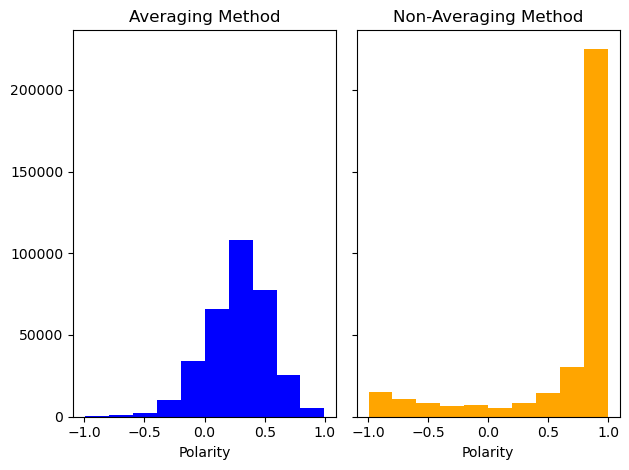

In [528]:
# Plot the distributions (we get better spread)
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)

ax[0].hist(df['polarity'], bins = 10, color = 'blue')
ax[0].set_title('Averaging Method')
ax[0].set_xlabel('Polarity')
ax[1].hist(df['polarity_total'], bins = 10, color = 'orange')
ax[1].set_title('Non-Averaging Method')
ax[1].set_xlabel('Polarity')

Text(0.5, 1.0, 'Non-Averaging Method')

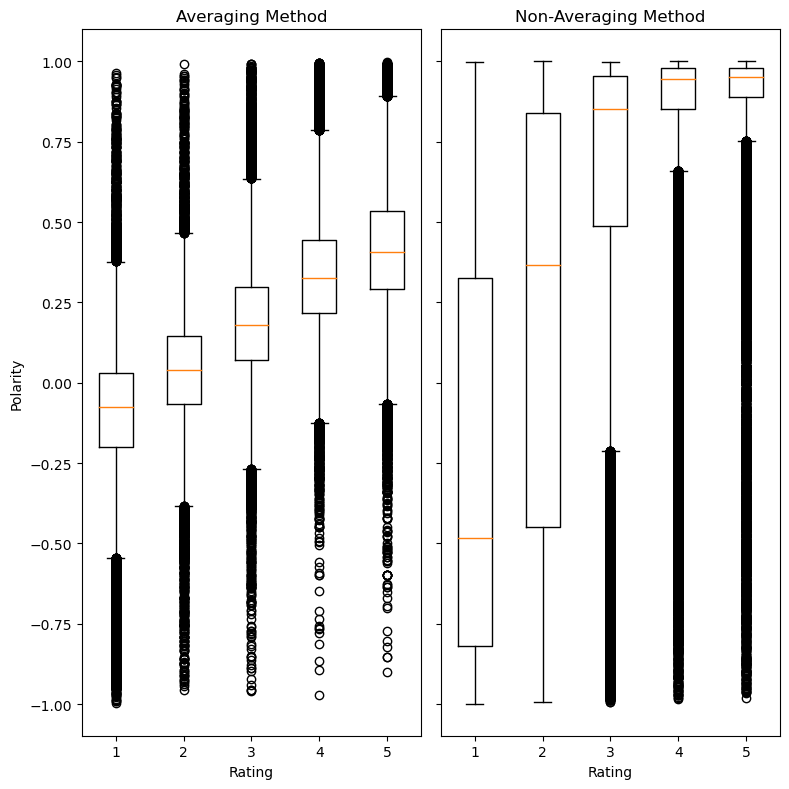

In [529]:
# See boxplots of polarity on the data
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=2, sharey=True, tight_layout=True)

# Get the data by rating
rating_data_avg = [df[df['rating'] == x]['polarity'] for x in range(1, int(df['rating'].max() + 1))]
rating_data_nonavg = [df[df['rating'] == x]['polarity_total'] for x in range(1, int(df['rating'].max() + 1))]

# We want a boxplot of polarity
ax[0].boxplot(rating_data_avg)
ax[1].boxplot(rating_data_nonavg)

# Subset polarity by ratings
ax[0].set_xticks([x + 1 for x in range(len(rating_data_avg))], labels=[str(x+1) for x in range(len(rating_data_avg))])
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Polarity')
ax[0].set_title('Averaging Method')

ax[1].set_xticks([x + 1 for x in range(len(rating_data_nonavg))], labels=[str(x+1) for x in range(len(rating_data_nonavg))])
ax[1].set_xlabel('Rating')
ax[1].set_title('Non-Averaging Method')

In [530]:
df['rating'].value_counts()

5.0    144834
4.0     81880
1.0     42550
3.0     39218
2.0     23018
Name: rating, dtype: int64

<Axes: ylabel='polarity_class,rating'>

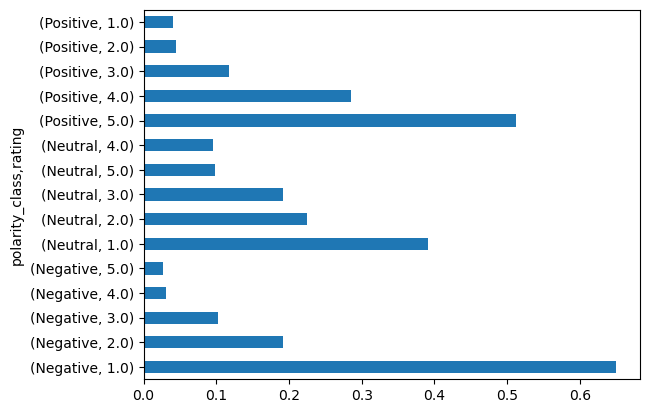

In [559]:
# Now give me a bar chart of positive, neurtal, negative against rating
df.groupby('polarity_class')['rating'].value_counts(normalize=True).plot(kind='barh')

<Axes: ylabel='polarity_tot_class,rating'>

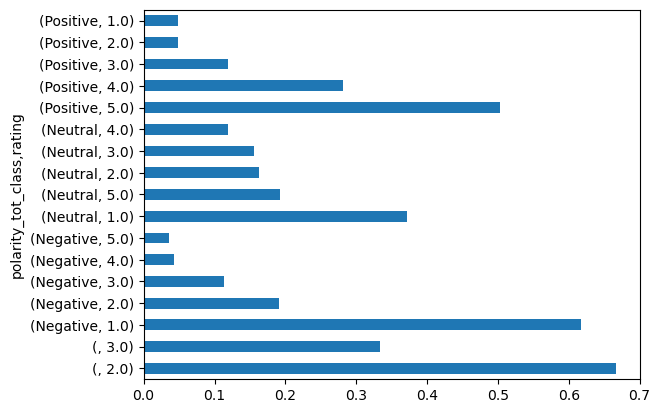

In [565]:
df.groupby('polarity_tot_class')['rating'].value_counts(normalize=True).plot(kind='barh')

In [605]:
count_data = df.groupby('polarity_class')['rating'].value_counts(normalize=True).to_frame()
count_data.sort_index(inplace=True)
count_data

rating
polarity_class rating          
Negative       1.0     0.649933
               2.0     0.191088
               3.0     0.101819
               4.0     0.031015
               5.0     0.026144
Neutral        1.0     0.390559
               2.0     0.224402
               3.0     0.191961
               4.0     0.094862
               5.0     0.098218
Positive       1.0     0.040169
               2.0     0.044340
               3.0     0.117137
               4.0     0.285619
               5.0     0.512735

Text(0.5, 1.0, 'Review Distributions by Class, Averaging Method')

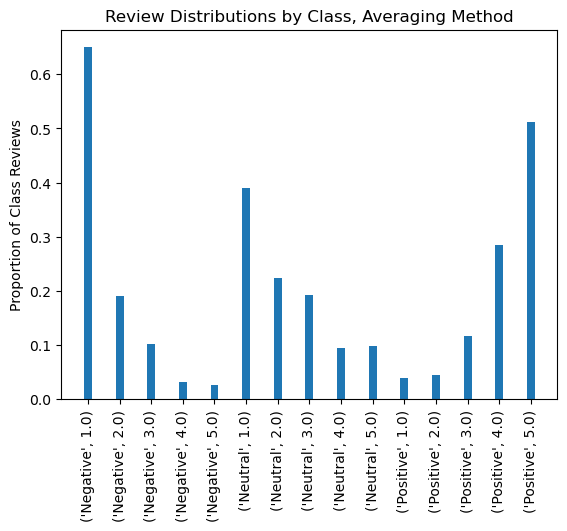

In [619]:
x = np.arange(0, len(count_data.index))

# Get this in Matplotlib
fig, ax = plt.subplots()

# Bar width
width = 0.25
multiplier = 0

for key, val in count_data.items():
    offset = width * multiplier
    bars = ax.bar(x=x + offset, height=val, width=width)
    multiplier += 1

ax.set_ylabel('Proportion of Class Reviews')
ax.set_xticks([xt for xt in range(len(x))], labels=(str(x) for x in list(count_data.index)), rotation=90)
ax.set_title('Review Distributions by Class, Averaging Method')

In [602]:
count_data = df.groupby('polarity_tot_class')['rating'].value_counts(normalize=True).to_frame()
count_data.sort_index(inplace=True)
count_data

rating
polarity_tot_class rating          
                   2.0     0.666667
                   3.0     0.333333
Negative           1.0     0.617354
                   2.0     0.190744
                   3.0     0.113592
                   4.0     0.042850
                   5.0     0.035460
Neutral            1.0     0.371090
                   2.0     0.162162
                   3.0     0.155178
                   4.0     0.119344
                   5.0     0.192226
Positive           1.0     0.047988
                   2.0     0.049114
                   3.0     0.118621
                   4.0     0.280860
                   5.0     0.503417

Text(0.5, 1.0, 'Review Distributions by Class, Non-Averaging Method')

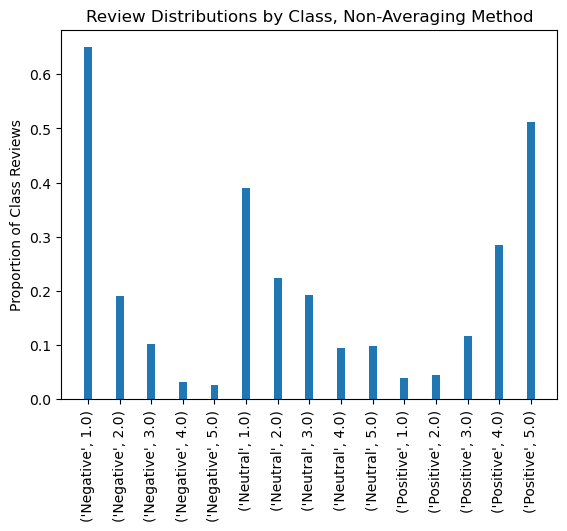

In [620]:
x = np.arange(0, len(count_data.index))

# Get this in Matplotlib
fig, ax = plt.subplots()

# Bar width
width = 0.25
multiplier = 0

for key, val in count_data.items():
    offset = width * multiplier
    bars = ax.bar(x=x + offset, height=val, width=width, label=key)
    multiplier += 1

ax.set_ylabel('Proportion of Class Reviews')
ax.set_xticks([xt for xt in range(len(x))], labels=(str(x) for x in list(count_data.index)), rotation=90)
ax.set_title('Review Distributions by Class, Non-Averaging Method')
# Rotate these lol, ugly

In [621]:
# Ok, drop some columns we will not use
df.drop(['polarity_total', 'polarity_tot_class'], axis = 1, inplace=True)
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_class
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,Positive
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,Positive
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,Positive
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,Neutral
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,Positive


In [360]:
# Subsets for visuals - get these as dataframes
# By rating (both numeric, positive/negative)
# By categories - cuisine <- you need to create your own groupings of these or just let it run depending on how many
# By price
# By michelin
# By elite (yes or no)
### Then you want by polarity class, and extreme polarities 

# What visuals do you want?
# Word clouds
# Word frequencies, n-grams
# Time series

In [361]:
# Best way to do this....
## Steps
## Get the base functionality for a matplotlib word cloud, just do it on all the data
## Same for bar charts of word frequencies, do it on all the data
# Then get your subsets, run the filtered data

# Then get some sort of analysis (significance testing) for words appearing


In [622]:
# Base for word cloud
# Let's start with the whole shebang

# If you have not downloaded the wordclouds already
## download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


In [623]:
# Join reviews as one string, remove the stopwords
stop_words = stopwords.words('english')

# If you want to add some custom words
# stop_words = STOPWORDS.update([]) <- put a list in here if you want to clean it
review_text = df['review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

# Remove punctuation, make lowercase
review_text = review_text.apply(lambda x: re.sub(r'[^\w\s]', '', x).lower())

# Join the text
review_text = ' '.join(review_text)

(-0.5, 399.5, 199.5, -0.5)

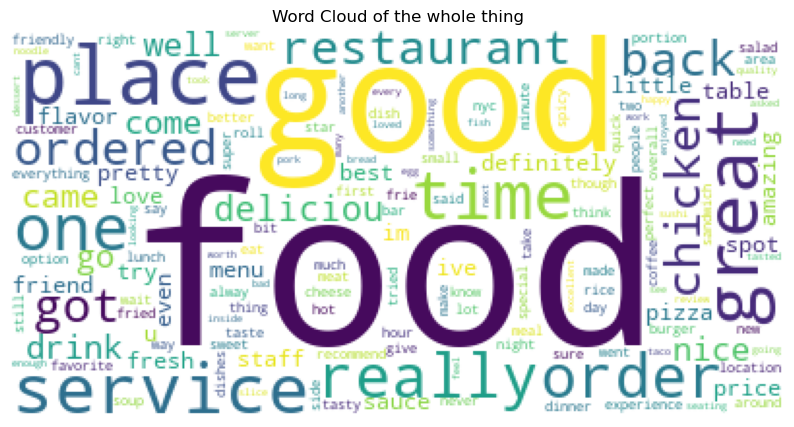

In [624]:
# Create the word cloud
review_cloud = WordCloud(collocations=False, background_color='white').generate(review_text)

# Add matplotlib capability
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Word Cloud of the whole thing')
ax.imshow(review_cloud)
ax.axis('off')

In [625]:
# Get a bar chart of word frequencies
word_freq_total = pd.Series(review_text.split())

# Remove stop words
word_freq = word_freq_total.loc[word_freq_total.isin(stop_words) == False]

# Get bar chart
word_freq = word_freq.value_counts().sort_values(ascending=False).to_frame().reset_index()
word_freq.columns = ['Word', 'Frequency']

word_freq['Percentage'] = round((100*word_freq['Frequency'] / len(word_freq_total)), 3)

word_freq.head()

# Get a top 10
word_freq = word_freq.iloc[0:10]

In [626]:
word_freq

,Word,Frequency,Percentage
0,food,220051,1.139
1,good,178892,0.926
2,place,146346,0.758
3,great,129492,0.671
4,service,112081,0.580
5,like,102838,0.533
6,one,91467,0.474
7,also,86223,0.446
8,really,84024,0.435
9,time,83448,0.432


Text(0.5, 1.0, 'Frequency of Words in All Reviews (Top 10). # Words = 19312023')

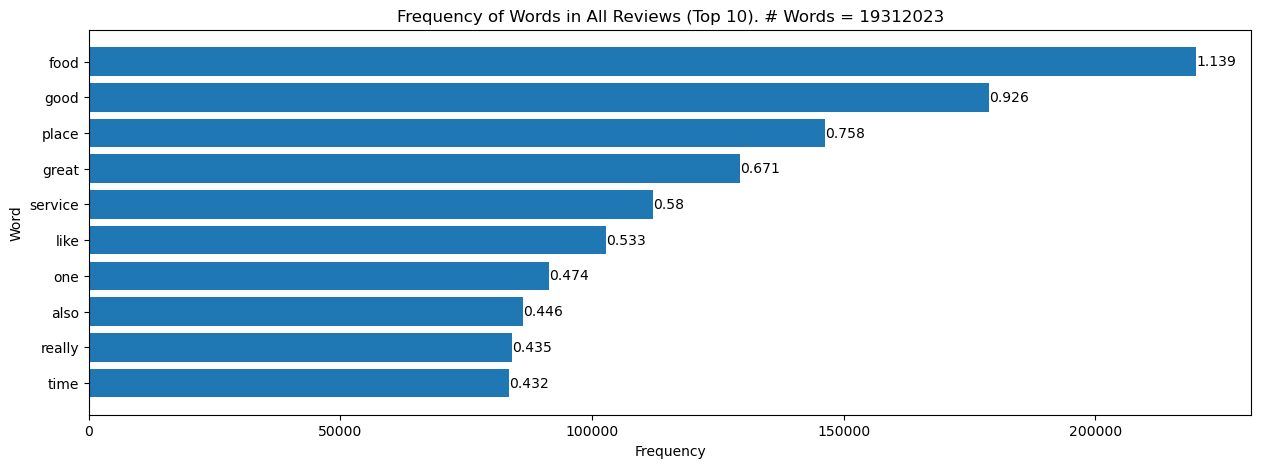

In [627]:
# Show bar chart
fig, ax = plt.subplots(figsize=(15,5))

y = word_freq['Word']
x = word_freq['Frequency']
percentage = word_freq['Percentage']

# Generate bar chart
hbars = ax.barh(y, x, align='center', label=percentage)

# Customize the labels
ax.set_yticks(y)
ax.invert_yaxis() # Invert to show top first
ax.bar_label(hbars, labels=[x for x in percentage])
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
ax.set_title('Frequency of Words in All Reviews (Top 10). # Words = ' + str(len(word_freq_total)))

In [628]:
# Try the ngrams now (for 2)
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize

# Prep data to remove stop words
word_freq_total = pd.Series(review_text.split())

# Remove stop words
word_freq = word_freq_total.loc[word_freq_total.isin(stop_words) == False]

# Now join all the text
feed_text = ' '.join(word_freq)

# Tokenize the non-stoppers
tokens = word_tokenize(feed_text)

# Generate n_grams
n_grams = list(ngrams(tokens, 2))

# Feed into NLTK Freq Dist
freq_dist = FreqDist(n_grams)

# Display the top N n-grams
print(freq_dist.most_common(10)) # We'll use this down the line when we start subsetting the data

[(('come', 'back'), 17711), (('highly', 'recommend'), 13763), (('really', 'good'), 12430), (('new', 'york'), 11650), (('pretty', 'good'), 10354), (('first', 'time'), 10286), (('food', 'good'), 10200), (('go', 'back'), 10114), (('happy', 'hour'), 9652), (('customer', 'service'), 8399)]


In [629]:
ngram_df = pd.DataFrame(freq_dist.most_common(10),
                        columns=['Ngram', 'Frequency'])

In [630]:
ngram_df

,Ngram,Frequency
0,"(come, back)",17711
1,"(highly, recommend)",13763
2,"(really, good)",12430
3,"(new, york)",11650
4,"(pretty, good)",10354
5,"(first, time)",10286
6,"(food, good)",10200
7,"(go, back)",10114
8,"(happy, hour)",9652
9,"(customer, service)",8399


In [631]:
ngram_df['Ngram'] = ngram_df['Ngram'].apply(' '.join)
ngram_df

,Ngram,Frequency
0,come back,17711
1,highly recommend,13763
2,really good,12430
3,new york,11650
4,pretty good,10354
5,first time,10286
6,food good,10200
7,go back,10114
8,happy hour,9652
9,customer service,8399


In [632]:
# Add percentage
ngram_df['Percentage'] = round(100*ngram_df['Frequency'] / len(n_grams), 3)
ngram_df

,Ngram,Frequency,Percentage
0,come back,17711,0.105
1,highly recommend,13763,0.082
2,really good,12430,0.074
3,new york,11650,0.069
4,pretty good,10354,0.061
5,first time,10286,0.061
6,food good,10200,0.061
7,go back,10114,0.060
8,happy hour,9652,0.057
9,customer service,8399,0.050


Text(0.5, 1.0, 'Frequency of N-grams in All Reviews (Top 10). # N-grams = 16849101')

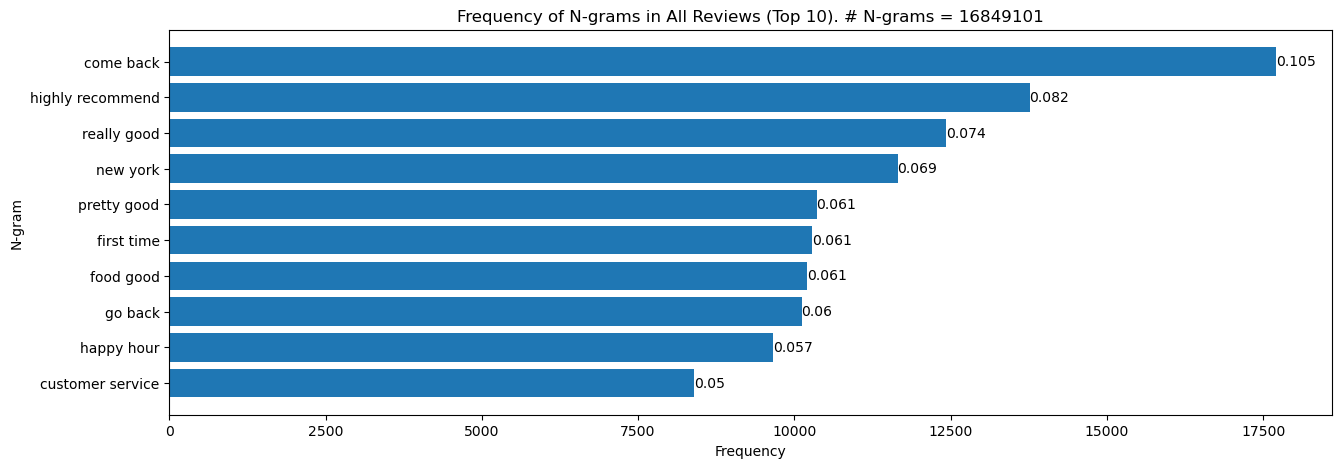

In [633]:
# Now give me a visual of this
# Show bar chart
fig, ax = plt.subplots(figsize=(15,5))

y = ngram_df['Ngram']
x = ngram_df['Frequency']
percentage = ngram_df['Percentage']

# Generate bar chart
hbars = ax.barh(y, x, align='center', label=percentage)

# Customize the labels
ax.set_yticks(y)
ax.invert_yaxis() # Invert to show top first
ax.bar_label(hbars, labels=[x for x in percentage])
ax.set_xlabel('Frequency')
ax.set_ylabel('N-gram')
ax.set_title('Frequency of N-grams in All Reviews (Top 10). # N-grams = ' + str(len(n_grams)))


In [634]:
# Ok, now let's get a time series of this stuff
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_class
0,190.0,1421.0,NaN,8/6/2023,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,Positive
1,580.0,148.0,2023.0,6/8/2023,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,Positive
2,531.0,186.0,2023.0,5/24/2023,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,Positive
3,770.0,213.0,2023.0,7/18/2023,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,Neutral
4,692.0,185.0,2023.0,11/12/2022,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,Positive


In [635]:
# Get into datetime format
from datetime import datetime

df['review_date'] = pd.to_datetime(df['review_date'])
ts = df.copy()
ts.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_class
0,190.0,1421.0,NaN,2023-08-06,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,Positive
1,580.0,148.0,2023.0,2023-06-08,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,Positive
2,531.0,186.0,2023.0,2023-05-24,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,Positive
3,770.0,213.0,2023.0,2023-07-18,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,Neutral
4,692.0,185.0,2023.0,2022-11-12,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,Positive


In [636]:
# Now get me a time series visual for the sentiment
date_counts = ts.groupby('review_date').count()['alias'].sort_values(ascending=False).to_frame() # Uneven dist, but we'll see
date_counts.columns = ['Count']
date_counts.head()

,Count
review_date,
2023-10-14,677
2023-11-12,675
2023-11-04,674
2023-11-11,638
2023-10-15,602


In [637]:
# Get ready to work with time series data
ts.index = pd.DatetimeIndex(df['review_date'])
ts.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_class
review_date,,,,,,,,,,,,,,
2023-08-06,190.0,1421.0,NaN,2023-08-06,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,Positive
2023-06-08,580.0,148.0,2023.0,2023-06-08,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,Positive
2023-05-24,531.0,186.0,2023.0,2023-05-24,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,Positive
2023-07-18,770.0,213.0,2023.0,2023-07-18,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,Neutral
2022-11-12,692.0,185.0,2023.0,2022-11-12,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,Positive


Text(0.5, 1.0, 'Review Volume')

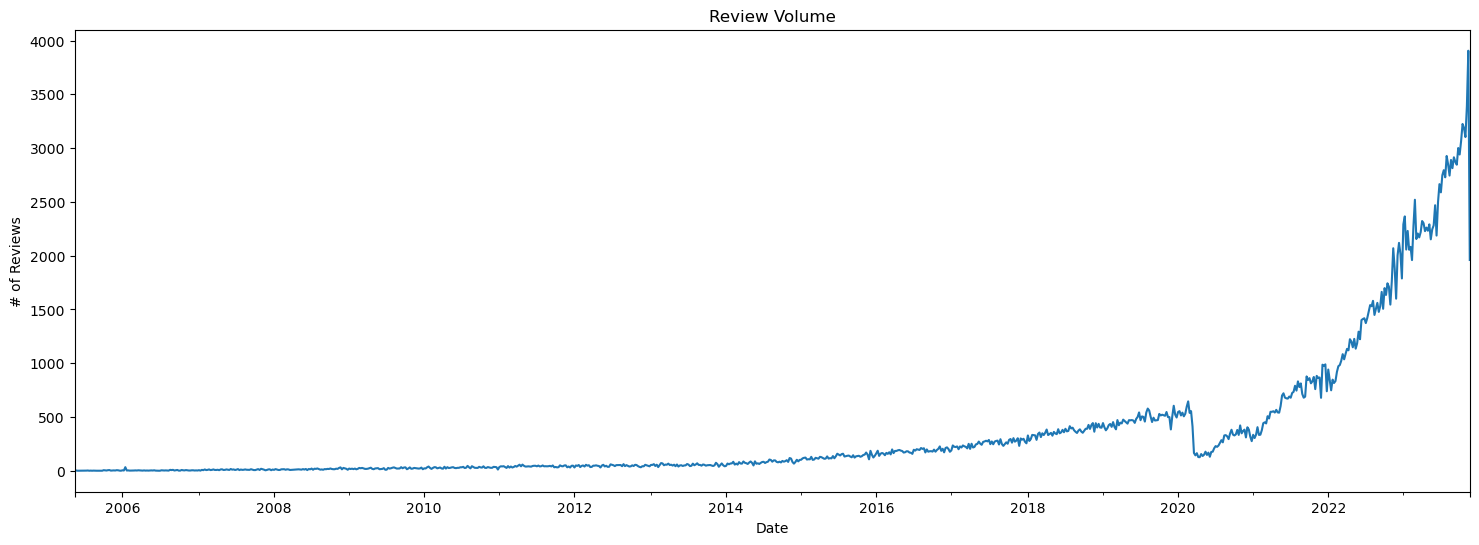

In [638]:
# Graph this
ts.index = pd.DatetimeIndex(df['review_date'])

fig, ax = plt.subplots(figsize = (18, 6))

# Use resample method for smoothing
ts.resample('W').count()['alias'].plot() # weekly frequency
ax.set_xlabel('Date')
ax.set_ylabel('# of Reviews')
ax.set_title('Review Volume')

In [639]:
ts.resample('M').mean()

/var/folders/_q/gmdf_7c54956tq7fvnbprqw00000gn/T/ipykernel_46626/2305925915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts.resample('M').mean()


,user_review_count,rating,michelin,polarity
review_date,,,,
2005-05-31,206.000000,3.333333,0.000000,0.127536
2005-06-30,560.000000,3.500000,0.000000,-0.125888
2005-07-31,187.750000,2.500000,0.000000,0.165006
2005-08-31,2097.000000,2.000000,0.000000,0.432875
2005-09-30,87.800000,2.800000,0.000000,0.347035
...,...,...,...,...
2023-07-31,167.928364,3.994118,0.014102,0.315911
2023-08-31,165.456550,4.007885,0.012552,0.315895
2023-09-30,162.183791,4.022263,0.014415,0.319074


Text(0.5, 1.0, 'Sentiment Over Time')

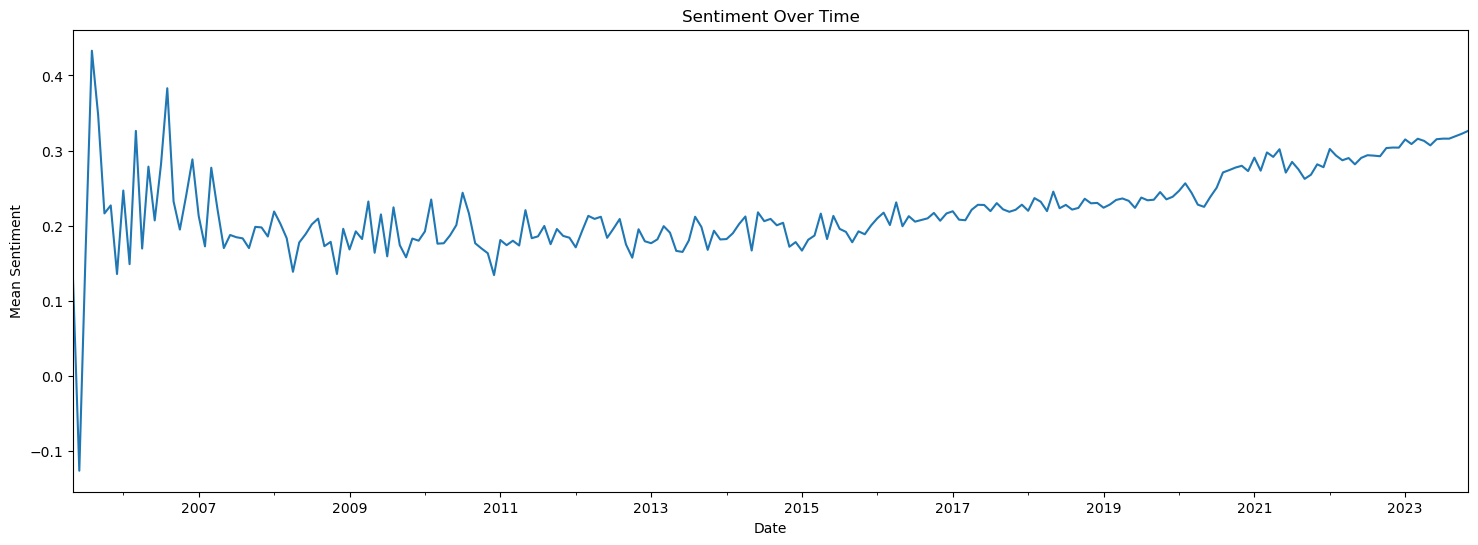

In [640]:
# Polarity over time
# You may want to cut this
fig, ax = plt.subplots(figsize = (18, 6))

# Use resample method for smoothing
ts.resample('M')['polarity'].mean().plot() # monthly frequency <- for these you need to resample on subsets first, and then merge the dataframes for the plot
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sentiment')
ax.set_title('Sentiment Over Time')

In [641]:
# Let's get our subsets
df.head()

,user_photo_count,user_review_count,elite_year,review_date,rating,review,alias,name,categories,price,location,michelin,polarity,polarity_class
0,190.0,1421.0,NaN,2023-08-06,3.0,Overall the food is pretty good but portions c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.303960,Positive
1,580.0,148.0,2023.0,2023-06-08,4.0,We've been to ani ramen in Montclair New Jerse...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.300825,Positive
2,531.0,186.0,2023.0,2023-05-24,4.0,The real deal Japanese rice. Crispy tofu was t...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.220371,Positive
3,770.0,213.0,2023.0,2023-07-18,3.0,This is located within Brookfield place. You c...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,-0.019190,Neutral
4,692.0,185.0,2023.0,2022-11-12,1.0,I have been wanting to try Ani Ramen for the l...,ani-ramen-house-new-york,Ani Ramen House,"[Noodles, Ramen]",NaN,"{'latitude': 40.7124742, 'longitude': -74.0156...",False,0.039393,Positive


In [653]:
test = df.copy()
categories = test['categories'].explode()
categories

0         Noodles
0           Ramen
1         Noodles
1           Ramen
2         Noodles
           ...   
331688      Pizza
331689      Pizza
331690      Pizza
331691      Pizza
331692      Pizza
Name: categories, Length: 730392, dtype: object

In [656]:
categories.value_counts()

Breakfast & Brunch       37763
Italian                  34099
Sandwiches               30099
Pizza                    29046
Cocktail Bars            27251
                         ...  
Cannabis Collective          2
Hotels & Travel              2
Pop-up Shops                 2
Armenian                     1
Professional Services        1
Name: categories, Length: 273, dtype: int64

In [658]:
categories.nunique() # 273 cuisine types are too much

273